In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Dataset 1
data_1 = pd.read_csv('Dataset1.csv')

# Encoding categorical variables using pd.Categorical
data_1['gender'] = pd.Categorical(data_1['gender'], categories=['Female', 'Male']).codes
data_1['ever_married'] = pd.Categorical(data_1['ever_married'], categories=['No', 'Yes']).codes
data_1['Residence_type'] = pd.Categorical(data_1['Residence_type'], categories=['Rural', 'Urban']).codes
data_1['smoking_status'] = pd.Categorical(data_1['smoking_status'], categories=['never smoked', 'formerly smoked', 'smokes']).codes
data_1['work_type'] = pd.Categorical(data_1['work_type'], categories=['Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private']).codes

# Fill missing values for numerical columns with the median
numerical_cols = data_1.select_dtypes(include=['int64', 'float64']).columns
data_1[numerical_cols] = data_1[numerical_cols].fillna(data_1[numerical_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = data_1.select_dtypes(include=['object']).columns

# Checking if there are any categorical columns with missing values
if len(categorical_cols) > 0:
    data_1[categorical_cols] = data_1[categorical_cols].fillna(data_1[categorical_cols].mode().iloc[0])

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_1, drop_first=True)

# Standardizing the Data
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
data_1[numerical_columns] = scaler.fit_transform(data_1[numerical_columns])


# Defining Features and Target Variable
x_data_1 = data_1.drop(['id','stroke'], axis = 1)
y_data_1 = data_1['stroke']

print(data_1.info())

#splitting the data into train and test sets
X_data_1_train, X_data_1_test, y_data_1_train, y_data_1_test = train_test_split(x_data_1, y_data_1, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int8   
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int8   
 6   work_type          5110 non-null   int8   
 7   Residence_type     5110 non-null   int8   
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int8   
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 304.5 KB
None


Decision Tree data 1 Data Accuracy: 0.9148727984344422
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.26      0.23      0.24        62

    accuracy                           0.91      1022
   macro avg       0.61      0.59      0.60      1022
weighted avg       0.91      0.91      0.91      1022



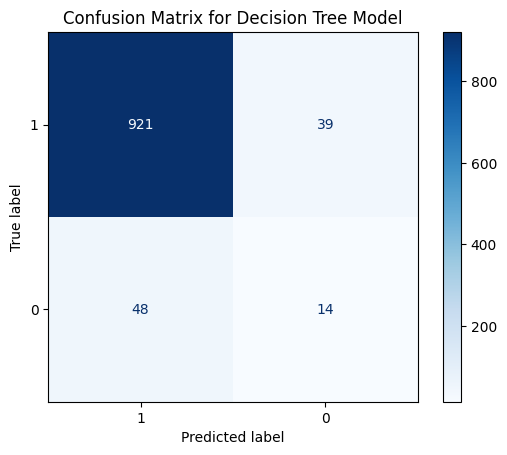

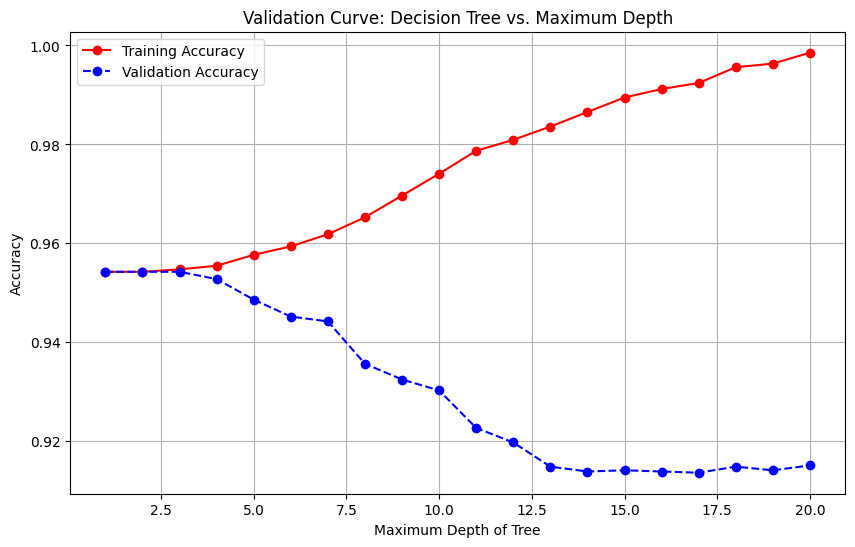

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree on dataset 1
dt_data_1 = DecisionTreeClassifier(random_state=1)
dt_data_1.fit(X_data_1_train, y_data_1_train)
y_pred_data_1 = dt_data_1.predict(X_data_1_test)


# Print Results for dataset 1
print("Decision Tree data 1 Data Accuracy:", accuracy_score(y_data_1_test, y_pred_data_1))
print(classification_report(y_data_1_test, y_pred_data_1))

# Confusion metrics for dataset 1
conf_matrix_dt = confusion_matrix(y_data_1_test, y_pred_data_1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()


# Step 1: Define the range of maximum depths to evaluate
depth_range = range(1, 21)

# Step 2: Calculate training and validation accuracies for different values of max depth
train_scores = []
validation_scores = []

for depth in depth_range:
    # Initialize Decision Tree model with the current value of max depth
    tree = DecisionTreeClassifier(max_depth=depth)

    # Calculate cross-validated training scores
    tree.fit(X_data_1_train, y_data_1_train)
    train_scores.append(tree.score(X_data_1_train, y_data_1_train))

    # Calculate cross-validated validation scores using 5-fold cross-validation
    val_score = cross_val_score(tree, X_data_1_train, y_data_1_train, cv=5)
    validation_scores.append(val_score.mean())

# Step 3: Plotting the Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(depth_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Maximum Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Validation Curve: Decision Tree vs. Maximum Depth')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Load Dataset 1
data_1 = pd.read_csv('Dataset1.csv')

# Encoding categorical variables using pd.Categorical
data_1['gender'] = pd.Categorical(data_1['gender'], categories=['Female', 'Male']).codes
data_1['ever_married'] = pd.Categorical(data_1['ever_married'], categories=['No', 'Yes']).codes
data_1['Residence_type'] = pd.Categorical(data_1['Residence_type'], categories=['Rural', 'Urban']).codes
data_1['smoking_status'] = pd.Categorical(data_1['smoking_status'], categories=['never smoked', 'formerly smoked', 'smokes']).codes
data_1['work_type'] = pd.Categorical(data_1['work_type'], categories=['Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private']).codes

# Fill missing values for numerical columns with the median
numerical_cols = data_1.select_dtypes(include=['int64', 'float64']).columns
data_1[numerical_cols] = data_1[numerical_cols].fillna(data_1[numerical_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = data_1.select_dtypes(include=['object']).columns

# Checking if there are any categorical columns with missing values
if len(categorical_cols) > 0:
    data_1[categorical_cols] = data_1[categorical_cols].fillna(data_1[categorical_cols].mode().iloc[0])

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_1, drop_first=True)

# Standardizing the Data
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
data_1[numerical_columns] = scaler.fit_transform(data_1[numerical_columns])


# Defining Features and Target Variable
x_data_1 = data_1.drop(['id','stroke'], axis = 1)
y_data_1 = data_1['stroke']

#print(data_1.info())

#splitting the data into train and test sets
X_data_1_train, X_data_1_test, y_data_1_train, y_data_1_test = train_test_split(x_data_1, y_data_1, test_size=0.2, random_state=42)


# Step 5: Define parameter grid for Decision Tree
param_grid_decision_tree = {
    'max_depth': [None, 5, 10, 15, 20],  # Different max depth values
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Step 6: Initialize and perform GridSearchCV for Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on training data
grid_search_decision_tree.fit(X_data_1_train, y_data_1_train)

# Get the best parameters and evaluate on the test set
best_decision_tree = grid_search_decision_tree.best_estimator_
y_pred_best_decision_tree = best_decision_tree.predict(X_data_1_test)

# Evaluate the fine-tuned Decision Tree model
accuracy_best_decision_tree = accuracy_score(y_data_1_test, y_pred_best_decision_tree)
classification_rep_best_decision_tree = classification_report(y_data_1_test, y_pred_best_decision_tree)
best_params_decision_tree = grid_search_decision_tree.best_params_

# Display the best parameters and model performance
print("Best parameters for Decision Tree:", best_params_decision_tree)
print("Accuracy of the best Decision Tree model:", accuracy_best_decision_tree)
print("Classification report:\n", classification_rep_best_decision_tree)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of the best Decision Tree model: 0.9373776908023483
Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.25      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.60      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



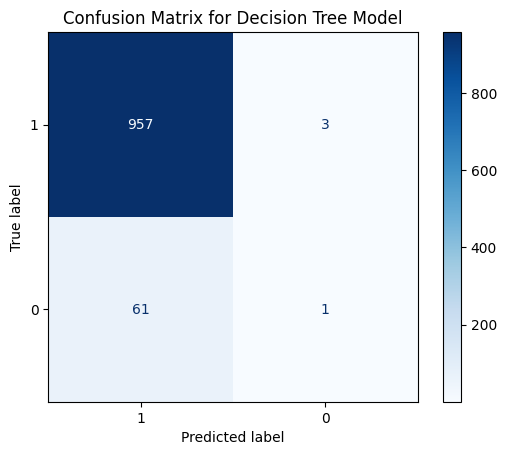

In [ ]:
# Confusion metrics for dataset 1
conf_matrix_dt = confusion_matrix(y_data_1_test, y_pred_best_decision_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

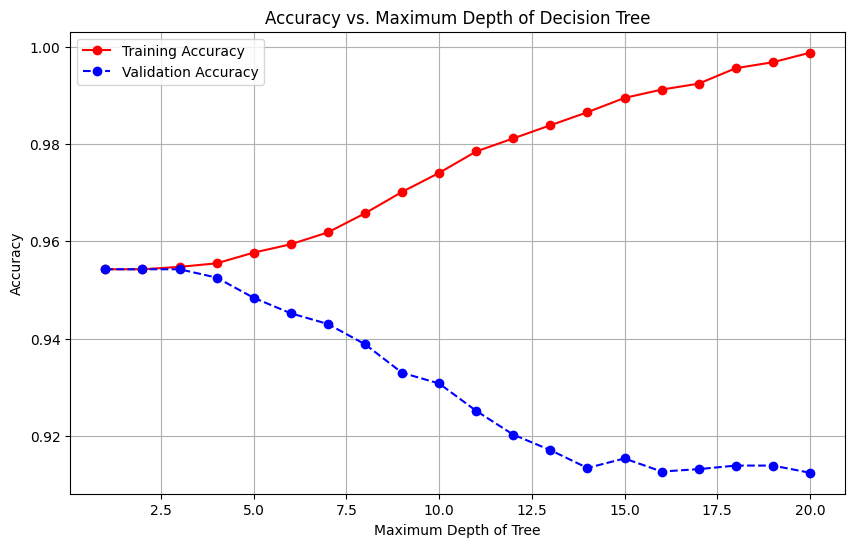

In [ ]:
# Step 1: Extract the best parameters from GridSearchCV
best_params = grid_search_decision_tree.best_params_
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

# Step 2: Define the range of maximum depths to evaluate
depth_range = range(1, 21)

# Step 3: Initialize lists for storing training and validation accuracies
train_scores = []
validation_scores = []

# Step 4: Calculate training and validation accuracies for different max_depth values
for depth in depth_range:
    # Initialize Decision Tree with the best min_samples_split and min_samples_leaf
    tree = DecisionTreeClassifier(max_depth=depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf,
                                   random_state=42)

    # Train the model on the full training set
    tree.fit(X_data_1_train, y_data_1_train)

    # Calculate training accuracy
    train_acc = tree.score(X_data_1_train, y_data_1_train)
    train_scores.append(train_acc)

    # Perform cross-validation to get validation accuracy
    val_acc = cross_val_score(tree, X_data_1_train, y_data_1_train, cv=5, scoring='accuracy').mean()
    validation_scores.append(val_acc)

# Step 5: Plotting the accuracy vs. maximum depth of the tree
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(depth_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Maximum Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maximum Depth of Decision Tree')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Dataset 2
data_2 = pd.read_csv('Dataset2.csv')


# Fill missing values for numerical columns with the median
numerical_cols = data_2.select_dtypes(include=['int64', 'float64']).columns
data_2[numerical_cols] = data_2[numerical_cols].fillna(data_2[numerical_cols].median())

# Standardizing the Data
numerical_columns = ['DistanceFromCompany','InterviewScore',  'SkillScore', 'PersonalityScore']

scaler = StandardScaler()
data_2[numerical_columns] = scaler.fit_transform(data_2[numerical_columns])

# Defining Features and Target Variable
x_data_2 = data_2.drop(['HiringDecision'], axis = 1)
y_data_2 = data_2['HiringDecision']

print(data_2.info())

#splitting the data into train and test sets
X_data_2_train, X_data_2_test, y_data_2_train, y_data_2_test = train_test_split(x_data_2, y_data_2, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   float64
 7   SkillScore           1500 non-null   float64
 8   PersonalityScore     1500 non-null   float64
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 129.0 KB
None


Decision Tree data 2 Data Accuracy: 0.8766666666666667
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       215
           1       0.76      0.84      0.79        85

    accuracy                           0.88       300
   macro avg       0.84      0.86      0.85       300
weighted avg       0.88      0.88      0.88       300



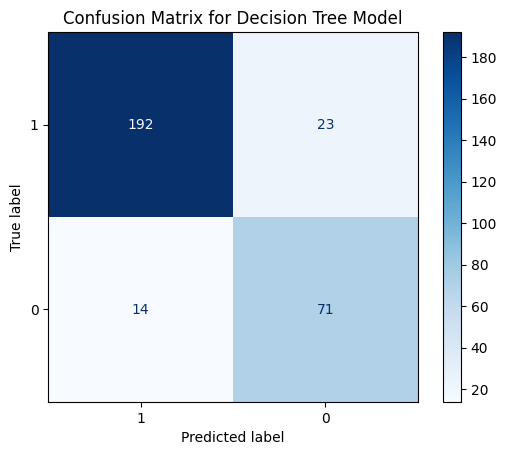

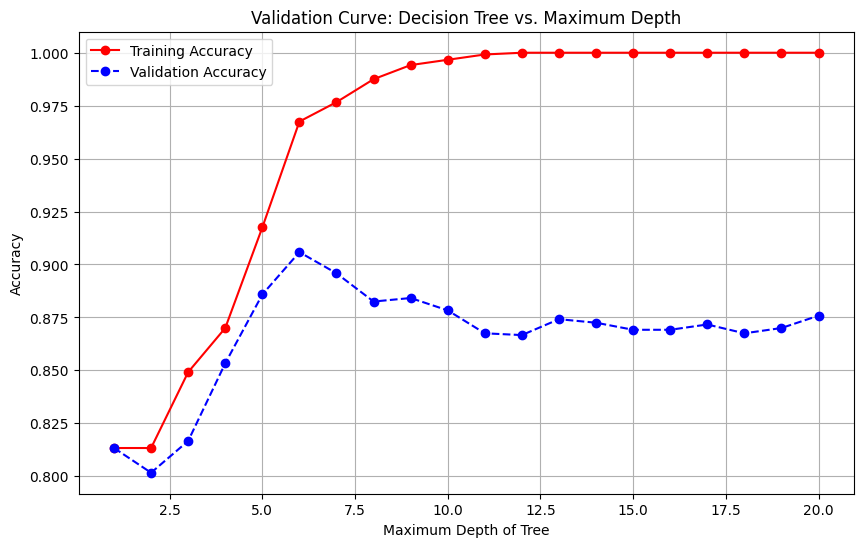

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


# Decision Tree on dataset 2
dt_data_2 = DecisionTreeClassifier(random_state=1)
dt_data_2.fit(X_data_2_train, y_data_2_train)
y_pred_data_2 = dt_data_2.predict(X_data_2_test)


print("Decision Tree data 2 Data Accuracy:", accuracy_score(y_data_2_test, y_pred_data_2))
print(classification_report(y_data_2_test, y_pred_data_2))


# Confusion metrics for dataset 2
conf_matrix_dt = confusion_matrix(y_data_2_test, y_pred_data_2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()


# Step 1: Define the range of maximum depths to evaluate
depth_range = range(1, 21)

# Step 2: Calculate training and validation accuracies for different values of max depth
train_scores = []
validation_scores = []

for depth in depth_range:
    # Initialize Decision Tree model with the current value of max depth
    tree = DecisionTreeClassifier(max_depth=depth)

    # Calculate cross-validated training scores
    tree.fit(X_data_2_train, y_data_2_train)
    train_scores.append(tree.score(X_data_2_train, y_data_2_train))

    # Calculate cross-validated validation scores using 5-fold cross-validation
    val_score = cross_val_score(tree, X_data_2_train, y_data_2_train, cv=5)
    validation_scores.append(val_score.mean())

# Step 3: Plotting the Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(depth_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Maximum Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Validation Curve: Decision Tree vs. Maximum Depth')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Dataset 2
data_2 = pd.read_csv('Dataset2.csv')


# Fill missing values for numerical columns with the median
numerical_cols = data_2.select_dtypes(include=['int64', 'float64']).columns
data_2[numerical_cols] = data_2[numerical_cols].fillna(data_2[numerical_cols].median())

# Standardizing the Data
numerical_columns = ['DistanceFromCompany','InterviewScore',  'SkillScore', 'PersonalityScore']

scaler = StandardScaler()
data_2[numerical_columns] = scaler.fit_transform(data_2[numerical_columns])

# Defining Features and Target Variable
x_data_2 = data_2.drop(['HiringDecision'], axis = 1)
y_data_2 = data_2['HiringDecision']

#print(data_2.info())

#splitting the data into train and test sets
X_data_2_train, X_data_2_test, y_data_2_train, y_data_2_test = train_test_split(x_data_2, y_data_2, test_size=0.2, random_state=42)

# Step 5: Define parameter grid for Decision Tree
param_grid_decision_tree = {
    'max_depth': [None, 5, 10, 15, 20],  # Different max depth values
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Step 6: Initialize and perform GridSearchCV for Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on training data
grid_search_decision_tree.fit(X_data_2_train, y_data_2_train)

# Get the best parameters and evaluate on the test set
best_decision_tree = grid_search_decision_tree.best_estimator_
y_pred_best_decision_tree2 = best_decision_tree.predict(X_data_2_test)

# Evaluate the fine-tuned Decision Tree model
accuracy_best_decision_tree = accuracy_score(y_data_2_test, y_pred_best_decision_tree2)
classification_rep_best_decision_tree = classification_report(y_data_2_test, y_pred_best_decision_tree2)
best_params_decision_tree = grid_search_decision_tree.best_params_

# Display the best parameters and model performance
print("Best parameters for Decision Tree:", best_params_decision_tree)
print("Accuracy of the best Decision Tree model:", accuracy_best_decision_tree)
print("Classification report:\n", classification_rep_best_decision_tree)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy of the best Decision Tree model: 0.9066666666666666
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       215
           1       0.83      0.85      0.84        85

    accuracy                           0.91       300
   macro avg       0.88      0.89      0.89       300
weighted avg       0.91      0.91      0.91       300



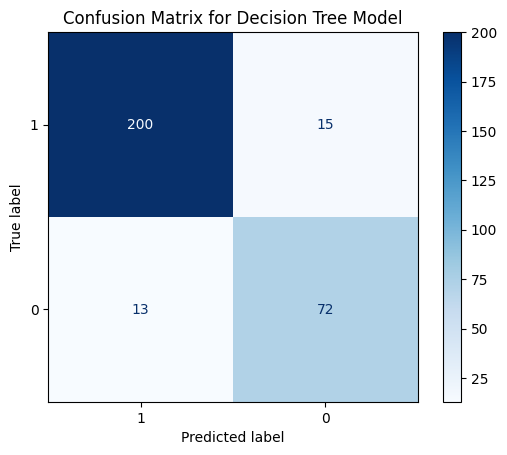

In [ ]:
# Confusion metrics for dataset 2
conf_matrix_dt = confusion_matrix(y_data_2_test, y_pred_best_decision_tree2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

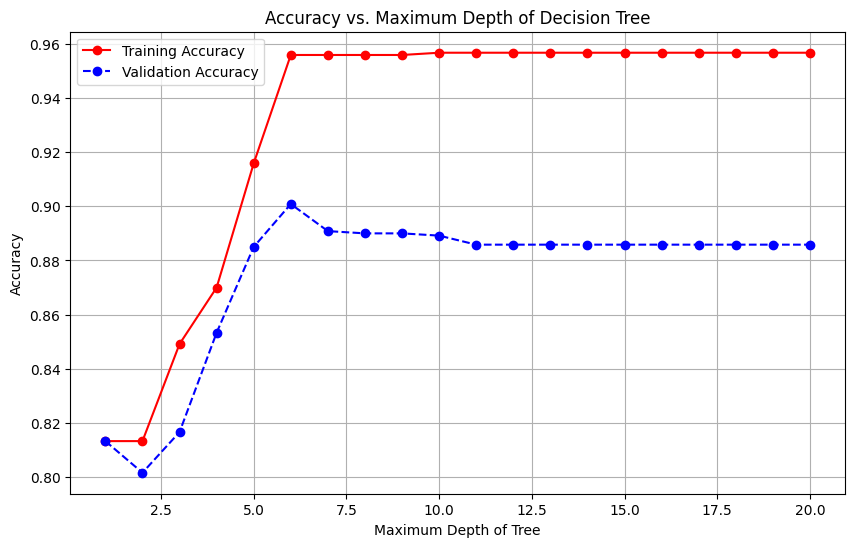

In [ ]:
# Step 1: Extract the best parameters from GridSearchCV
best_params = grid_search_decision_tree.best_params_
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

# Step 2: Define the range of maximum depths to evaluate
depth_range = range(1, 21)

# Step 3: Initialize lists for storing training and validation accuracies
train_scores = []
validation_scores = []

# Step 4: Calculate training and validation accuracies for different max_depth values
for depth in depth_range:
    # Initialize Decision Tree with the best min_samples_split and min_samples_leaf
    tree = DecisionTreeClassifier(max_depth=depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf,
                                   random_state=42)

    # Train the model on the full training set
    tree.fit(X_data_2_train, y_data_2_train)

    # Calculate training accuracy
    train_acc = tree.score(X_data_2_train, y_data_2_train)
    train_scores.append(train_acc)

    # Perform cross-validation to get validation accuracy
    val_acc = cross_val_score(tree, X_data_2_train, y_data_2_train, cv=5, scoring='accuracy').mean()
    validation_scores.append(val_acc)

# Step 5: Plotting the accuracy vs. maximum depth of the tree
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(depth_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Maximum Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maximum Depth of Decision Tree')
plt.legend(loc='best')
plt.grid()
plt.show()
